In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('CarPrice.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#profile = ProfileReport(df)
#profile.to_file('CarPrice.html')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
df_numerical = df.drop(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],axis=1)
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    int64  
 5   enginesize        205 non-null    int64  
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    int64  
 10  peakrpm           205 non-null    int64  
 11  citympg           205 non-null    int64  
 12  highwaympg        205 non-null    int64  
 13  price             205 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 22.6 KB


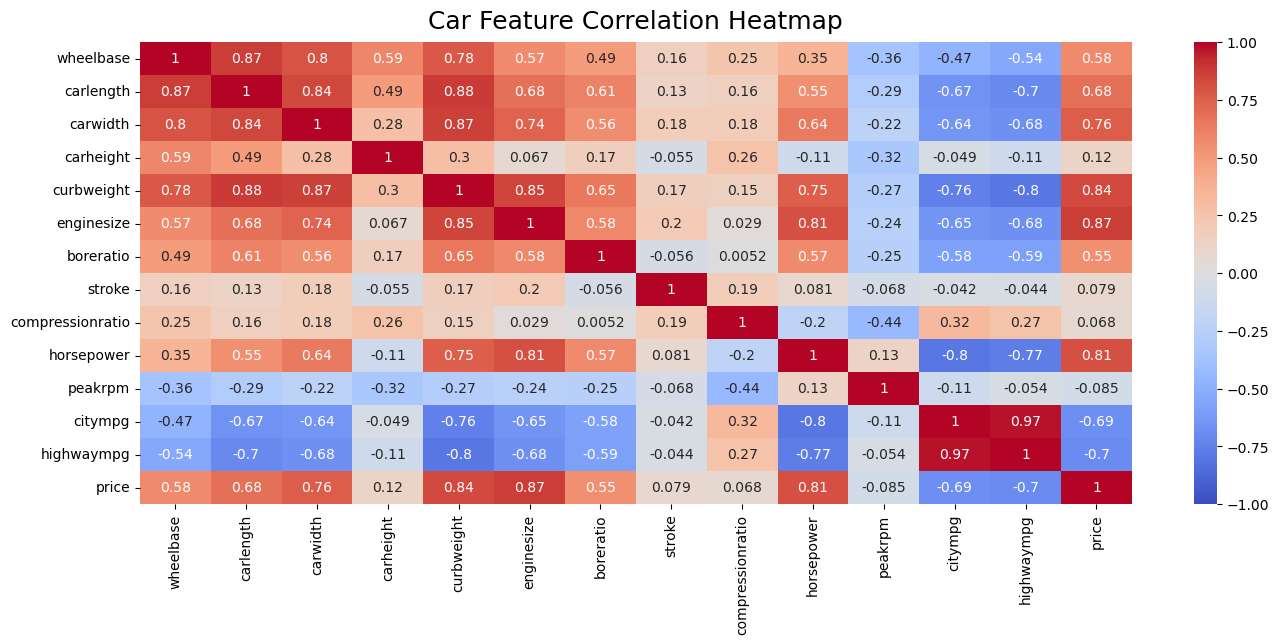

In [60]:
rr = pd.DataFrame(df_numerical, columns=df_numerical.columns)
#fig, ax = plt.subplots()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(rr.corr(),cmap='coolwarm', vmin=-1, vmax=1, annot=True)
heatmap.set_title('Car Feature Correlation Heatmap', fontdict={'fontsize':18}, pad=10);
plt.savefig('CorrelationHeatmap.png', dpi=300, bbox_inches='tight')

In [8]:
df_numerical.max()

wheelbase             120.90
carlength             208.10
carwidth               72.30
carheight              59.80
curbweight           4066.00
enginesize            326.00
boreratio               3.94
stroke                  4.17
compressionratio       23.00
horsepower            288.00
peakrpm              6600.00
citympg                49.00
highwaympg             54.00
price               45400.00
dtype: float64

In [9]:
df_numerical.min()

wheelbase             86.60
carlength            141.10
carwidth              60.30
carheight             47.80
curbweight          1488.00
enginesize            61.00
boreratio              2.54
stroke                 2.07
compressionratio       7.00
horsepower            48.00
peakrpm             4150.00
citympg               13.00
highwaympg            16.00
price               5118.00
dtype: float64

In [10]:
df_numerical.var()

wheelbase           3.626178e+01
carlength           1.522087e+02
carwidth            4.601900e+00
carheight           5.970800e+00
curbweight          2.711079e+05
enginesize          1.734114e+03
boreratio           7.335631e-02
stroke              9.834309e-02
compressionratio    1.577710e+01
horsepower          1.563741e+03
peakrpm             2.275153e+05
citympg             4.279962e+01
highwaympg          4.742310e+01
price               6.382176e+07
dtype: float64

# Preprocessing data

In [12]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [13]:
#df_processed = df_numerical.drop(['stroke', 'compressionratio', 'peakrpm', 'carheight'],axis=1)
df_processed = df_numerical
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   wheelbase         205 non-null    float64
 1   carlength         205 non-null    float64
 2   carwidth          205 non-null    float64
 3   carheight         205 non-null    float64
 4   curbweight        205 non-null    int64  
 5   enginesize        205 non-null    int64  
 6   boreratio         205 non-null    float64
 7   stroke            205 non-null    float64
 8   compressionratio  205 non-null    float64
 9   horsepower        205 non-null    int64  
 10  peakrpm           205 non-null    int64  
 11  citympg           205 non-null    int64  
 12  highwaympg        205 non-null    int64  
 13  price             205 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 22.6 KB


In [14]:
#df = pd.get_dummies(df, columns = ['Pclass', 'Sex','Embarked' ], drop_first = True)
#df_processed = pd.get_dummies(df_processed, columns = ['symboling', 'CarName', 'fueltype', 'aspiration',
#       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem' ], drop_first = True)
df_processed.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [15]:
df_processed.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

<Figure size 1600x600 with 0 Axes>

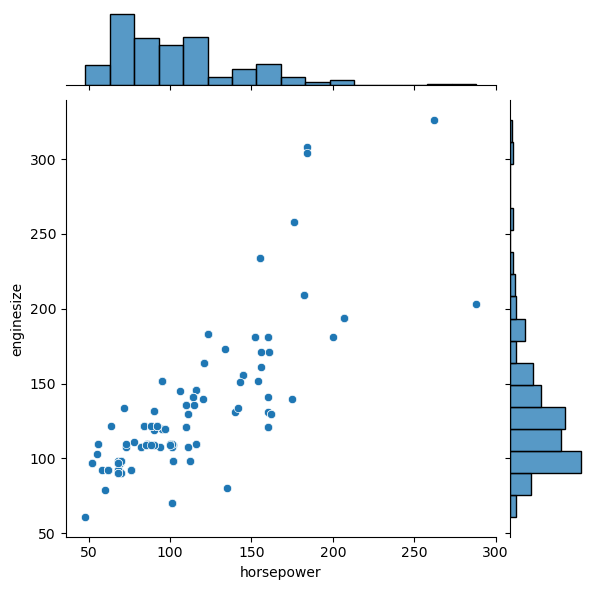

In [139]:
plt.figure(figsize=(16, 6))
sns.jointplot(x=df_processed['horsepower'], y=df_processed['enginesize'], data=df, kind='scatter')
plt.savefig('Jointplot.png', dpi=300, bbox_inches='tight')

# Training

In [17]:
from sklearn.model_selection import train_test_split

train_cols = df_processed.drop(['price'],axis=1).columns
test_col = 'price'

x_train, x_test, y_train, y_test = train_test_split(df_processed[train_cols], df_processed[test_col], test_size = 0.3, random_state = 42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((143, 13), (62, 13), (143,), (62,))

In [137]:
#Selecting 10 best features
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k=10)
x_new = selector.fit_transform(x_train, y_train)
y_train

array([[ 102.4,  175.6,   66.5, ..., 4200. ,   27. ,   32. ],
       [ 102.7,  178.4,   68. , ..., 5000. ,   19. ,   24. ],
       [ 102.4,  175.6,   66.5, ..., 4500. ,   30. ,   33. ],
       ...,
       [  94.5,  165.3,   63.8, ..., 5200. ,   31. ,   37. ],
       [ 102.9,  183.5,   67.7, ..., 5200. ,   19. ,   24. ],
       [ 100.4,  184.6,   66.5, ..., 5200. ,   17. ,   22. ]])

In [100]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
linear = LinearRegression()
lasso = linear_model.Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
svr = make_pipeline(StandardScaler(), SVR(C=10000.0, epsilon=1))

In [135]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
linear = LinearRegression()
lasso = linear_model.Lasso(alpha=0.1)
ridge = Ridge(alpha=1.0)

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
svr = make_pipeline(StandardScaler(), SVR(C=20000.0, epsilon=1))
for model in [linear, lasso, ridge, svr]:
    print(model)
    model.fit(x_train,y_train)
    model.predict(x_test)
    print('Train R2 score:' , model.score(x_train,y_train))
    print('Test R2 score:' , model.score(x_test,y_test))
    y_pred = model.predict(x_test)
    print('Test RSME:' , np.sqrt(mean_squared_error(y_test, y_pred)))

LinearRegression()
Train R2 score: 0.8668471206876327
Test R2 score: 0.7974965704208905
Test RSME: 3745.7074478716527
Lasso(alpha=0.1)
Train R2 score: 0.8668471124182231
Test R2 score: 0.7974952486635776
Test RSME: 3745.719672129145
Ridge()
Train R2 score: 0.8667551641134711
Test R2 score: 0.7977536823688991
Test RSME: 3743.3287917961284
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=20000.0, epsilon=1))])
Train R2 score: 0.9783056879646024
Test R2 score: 0.8404354129076006
Test RSME: 3324.9561297950895
